In [14]:
import gym
import numpy as np
import os
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
from torch.autograd import Variable


from itertools import count
from copy import deepcopy
from PIL import Image

import torchvision.transforms as T

In [15]:
#N_STEPS = 5
SEED = 1
N_GAMES = 20000
N_ACTIONS = 2

LR = 3e-3
GAMMA = .95

In [23]:
run_set(10, 2, 3, LR, GAMMA)

score:  23
score:  36
score:  17
score:  20
score:  25
score:  9
score:  10
score:  9
score:  10
score:  9
score:  9
score:  10
score:  10
score:  8
score:  9
score:  13
score:  16
score:  11
score:  23
score:  13
score:  12
score:  24
score:  10
score:  18
score:  9
score:  11
score:  9
score:  11
score:  10
score:  10
score:  10
score:  12
score:  11
score:  11
score:  25
score:  11
score:  13
score:  9
score:  9
score:  14
score:  9
score:  11
score:  12
score:  14
score:  11
score:  9
score:  8
score:  10
score:  10
score:  10
score:  10
score:  8
score:  9
score:  10
score:  11
score:  9
score:  10
score:  9
score:  10
score:  8
score:  8
score:  8
score:  9
score:  9
score:  9
score:  10
score:  10
score:  10
score:  10
score:  10
score:  9
score:  10
score:  9
score:  10
score:  11
score:  9
score:  9
score:  10
score:  9
score:  10
score:  10
score:  8
score:  9
score:  10
score:  9
score:  9
score:  10
score:  9
score:  9
score:  10
score:  10
score:  9
score:  9
score:  9
sco

score:  8
score:  10
score:  11
score:  11
score:  10
score:  10
score:  9
score:  8
score:  9
score:  10
score:  10
score:  9
score:  11
score:  9
score:  10
score:  9
score:  10
score:  9
score:  9
score:  10
score:  9
score:  10
score:  9
score:  10
score:  9
score:  10
score:  10
score:  10
score:  9
score:  9
score:  11
score:  8
score:  11
score:  9
score:  9
score:  10
score:  11
score:  8
score:  9
score:  9
score:  9
score:  10
score:  10
score:  10
score:  9
score:  10
score:  10
score:  10
score:  10
score:  8
score:  10
score:  9
score:  9
score:  10
score:  9
score:  10
score:  10
score:  9
score:  9
score:  9
score:  11
score:  8
score:  9
score:  10
score:  8
score:  9
score:  11
score:  10
score:  10
score:  10
score:  10
score:  8
score:  8
score:  9
score:  10
score:  10
score:  9
score:  10
score:  10
score:  10
score:  10
score:  9
score:  9
score:  9
score:  11
score:  8
score:  9
score:  9
score:  10
score:  10
score:  9
score:  10
score:  10
score:  9
score:  10


score:  10
score:  12
score:  9
score:  10
score:  10
score:  9
score:  11
score:  10
score:  9
score:  10
score:  10
score:  11
score:  13
score:  17
score:  9
score:  21
score:  11
score:  10
score:  20
score:  15
score:  10
score:  14
score:  10
score:  31
score:  19
score:  9
score:  11
score:  16
score:  17
score:  14
score:  27
score:  23
score:  12
score:  13
score:  15
score:  11
score:  27
score:  17
score:  40
score:  66
score:  26
score:  53
score:  13
score:  15
score:  10
score:  16
score:  16
score:  13
score:  15
score:  16
score:  12
score:  19
score:  13
score:  13
score:  39
score:  11
score:  9
score:  9
score:  10
score:  11
score:  8
score:  10
score:  12
score:  17
score:  10
score:  11
score:  13
score:  10
score:  9
score:  9
score:  9
score:  12
score:  9
score:  12
score:  14
score:  20
score:  18
score:  15
score:  23
score:  37
score:  29
score:  16
score:  18
score:  16
score:  18
score:  18
score:  12
score:  12
score:  21
score:  38
score:  31
score:  16


score:  9
score:  9
score:  10
score:  9
score:  10
score:  9
score:  10
score:  10
score:  8
score:  9
score:  10
score:  10
score:  10
score:  10
score:  10
score:  10
score:  8
score:  10
score:  9
score:  10
score:  9
score:  9
score:  10
score:  9
score:  9
score:  8
score:  10
score:  10
score:  10
score:  10
score:  10
score:  10
score:  9
score:  10
score:  10
score:  8
score:  10
score:  10
score:  8
score:  10
score:  10
score:  10
score:  10
score:  9
score:  10
score:  10
score:  10
score:  10
score:  9
score:  10
score:  10
score:  9
score:  10
score:  9
score:  9
score:  10
score:  9
score:  10
score:  11
score:  9
score:  10
score:  10
score:  10
score:  9
score:  9
score:  9
score:  9
score:  9
score:  10
score:  11
score:  9
score:  8
score:  10
score:  10
score:  10
score:  9
score:  10
score:  10
score:  10
score:  9
score:  8
score:  9
score:  10
score:  10
score:  10
score:  9
score:  10
score:  11
score:  10
score:  8
score:  8
score:  9
score:  9
score:  9
score:

score:  10
score:  10
score:  9
score:  39
score:  33
score:  13
score:  12
score:  29
score:  52
score:  28
score:  12
score:  13
score:  12
score:  11
score:  10
score:  15
score:  10
score:  28
score:  28
score:  11
score:  31
score:  54
score:  41
score:  118
score:  16
score:  12
score:  9
score:  38
score:  9
score:  11
score:  10
score:  10
score:  9
score:  10
score:  9
score:  9
score:  11
score:  12
score:  11
score:  9
score:  9
score:  13
score:  14
score:  8
score:  14
score:  14
score:  10
score:  12
score:  10
score:  9
score:  41
score:  10
score:  39
score:  17
score:  15
score:  11
score:  32
score:  13
score:  14
score:  51
score:  9
score:  10
score:  9
score:  9
score:  9
score:  12
score:  9
score:  13
score:  10
score:  10
score:  9
score:  12
score:  13
score:  14
score:  13
score:  27
score:  43
score:  23
score:  21
score:  21
score:  17
score:  48
score:  46
score:  13
score:  45
score:  55
score:  13
score:  13
score:  9
score:  40
score:  36
score:  29
scor

KeyboardInterrupt: 

In [244]:
#Variable(torch.FloatTensor(states_memory))
Variable(torch.from_numpy(np.array(states_memory)).float()).view(10,3,80,160)

Variable containing:
( 0 , 0 ,.,.) = 
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254
      ...         ⋱        ...      
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254

( 0 , 1 ,.,.) = 
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254
      ...         ⋱        ...      
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254

( 0 , 2 ,.,.) = 
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254
      ...         ⋱        ...      
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254
      ⋮  

( 1 , 0 ,.,.) = 
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254
      ... 

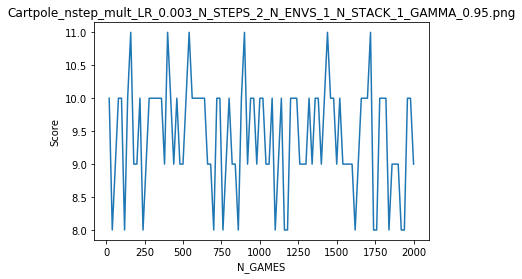

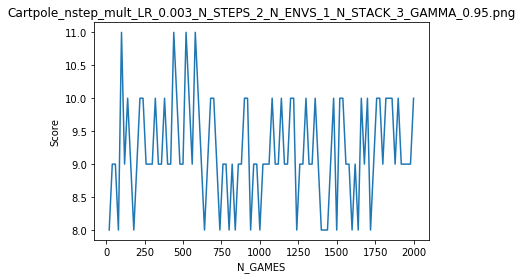

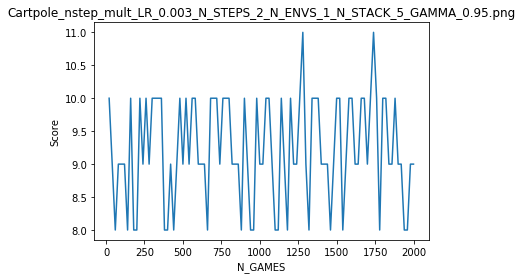

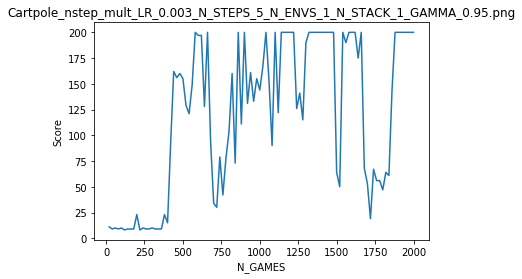

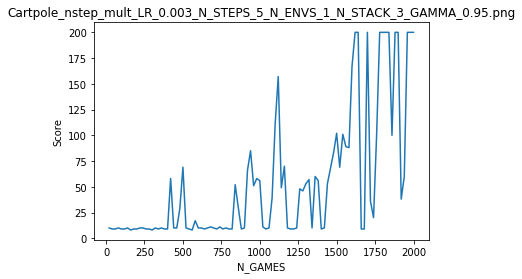

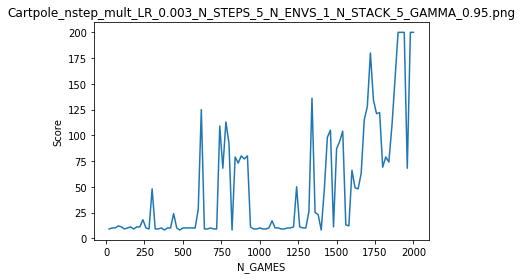

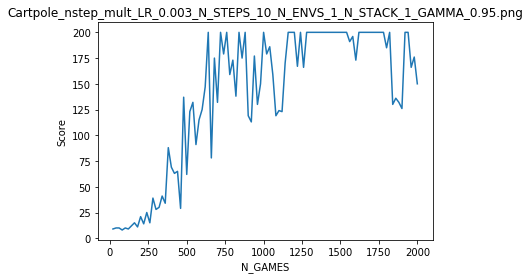

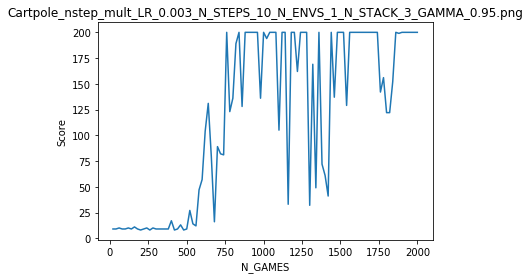

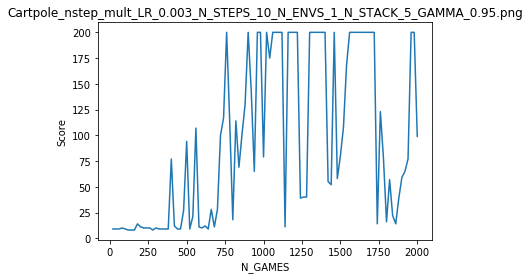

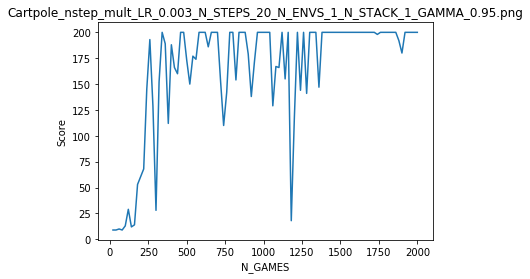

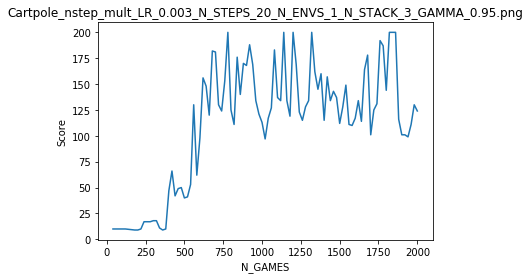

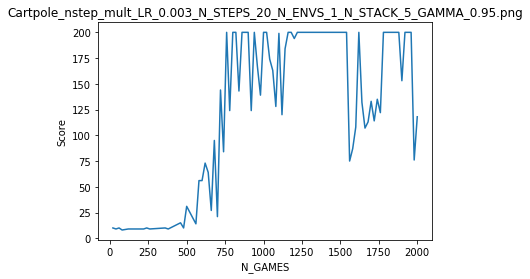

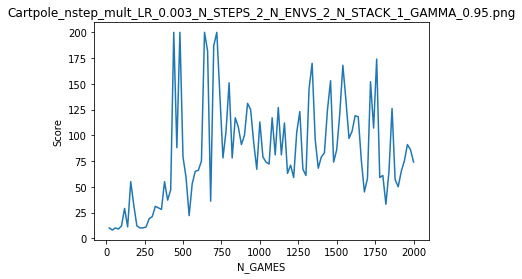

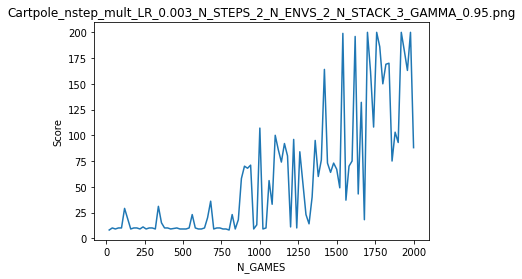

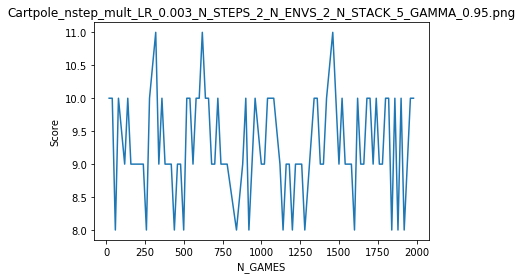

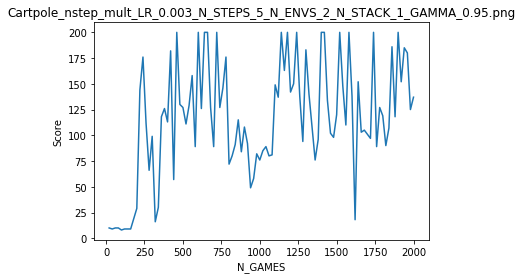

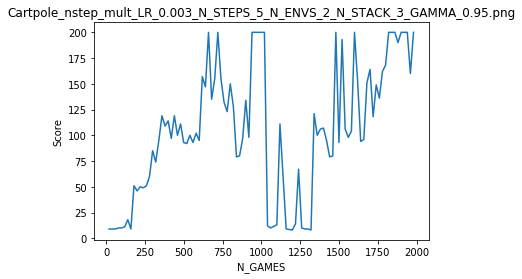

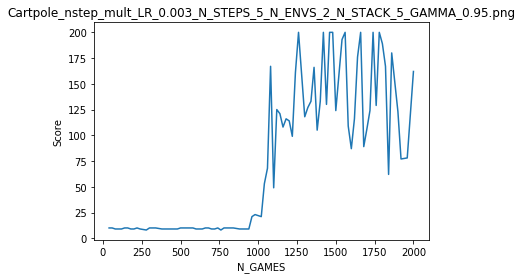

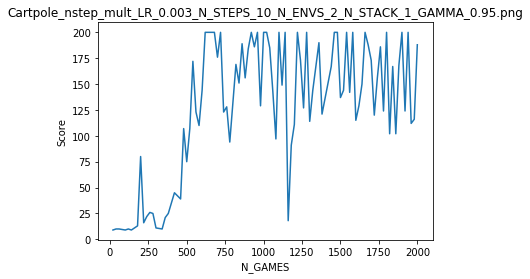

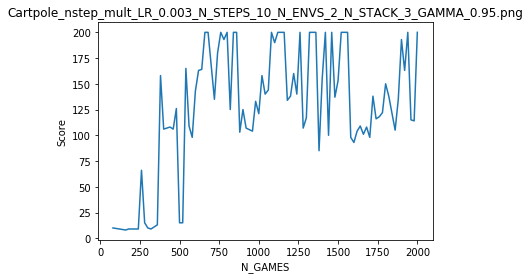

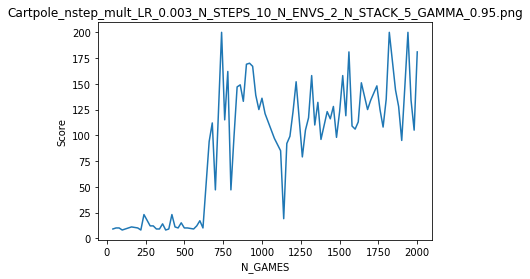

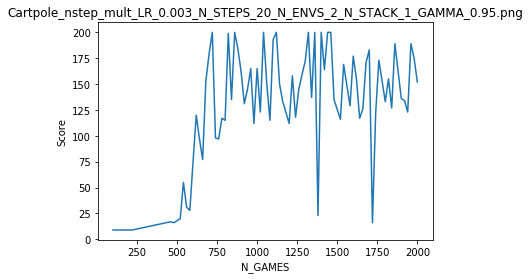

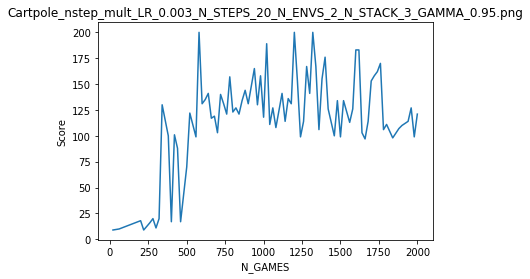

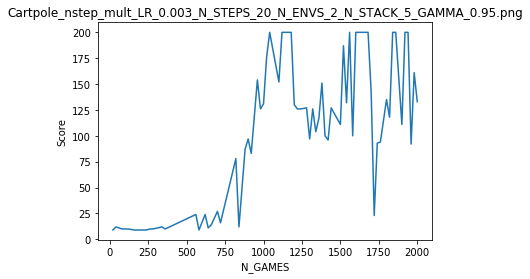

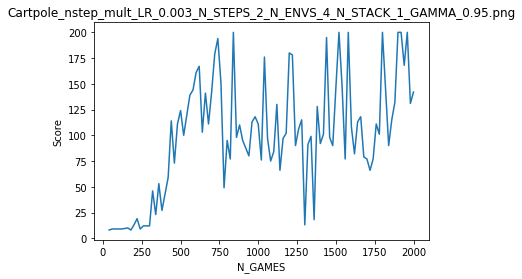

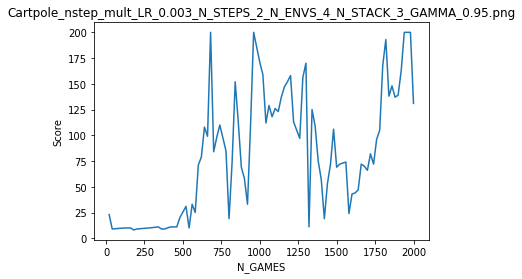

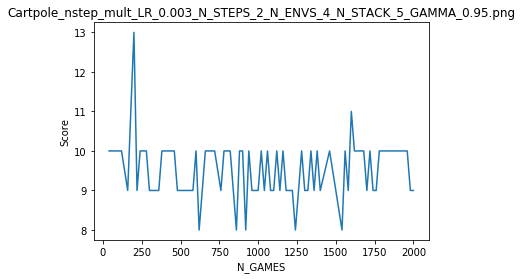

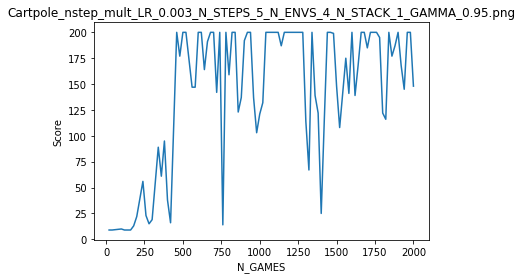

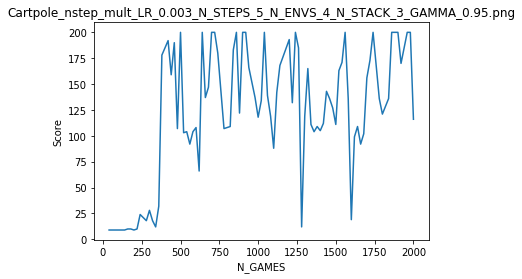

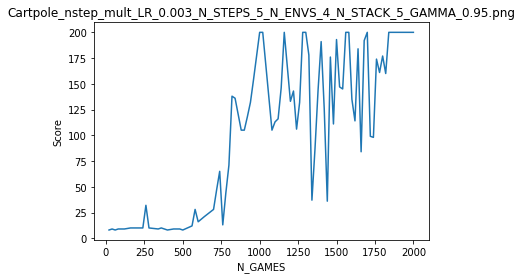

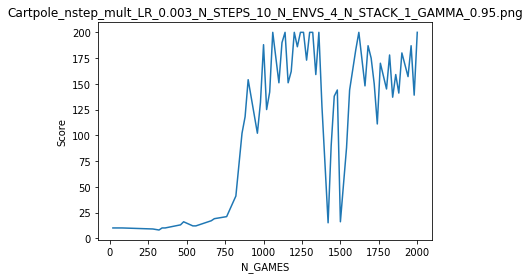

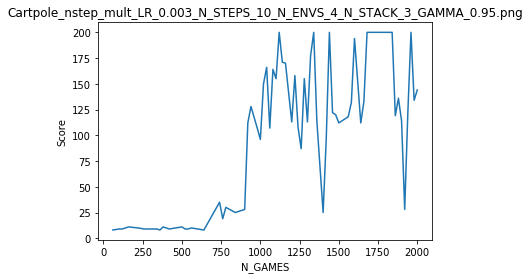

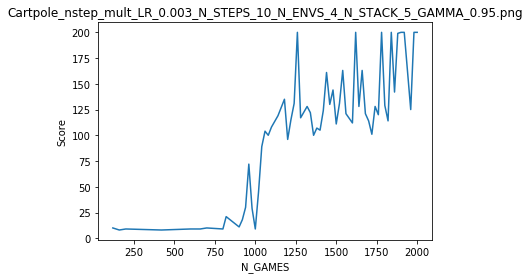

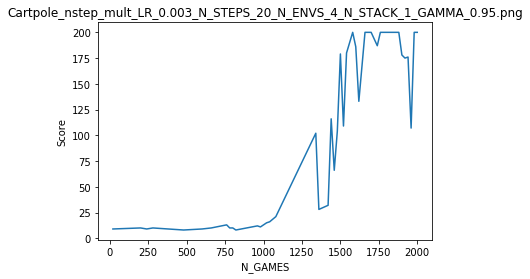

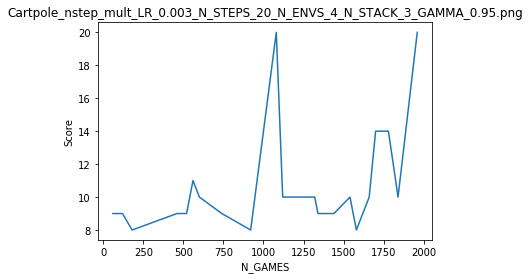

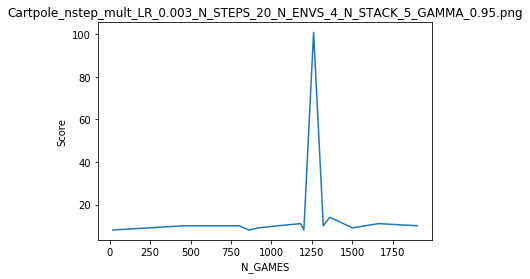

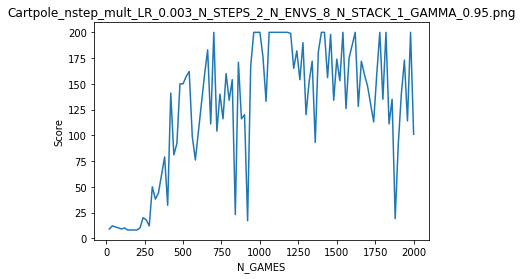

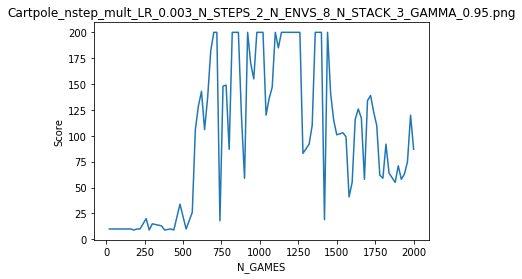

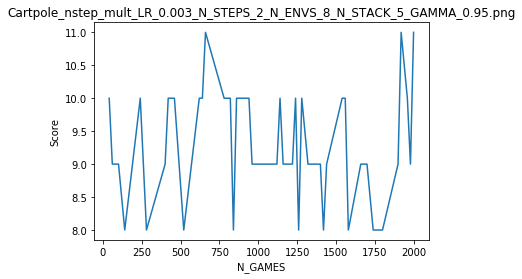

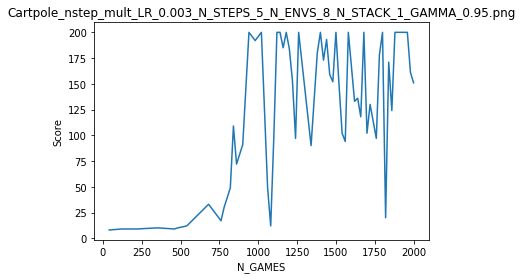

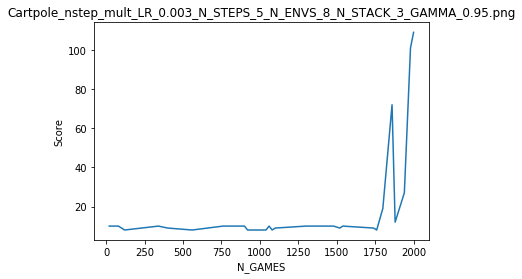

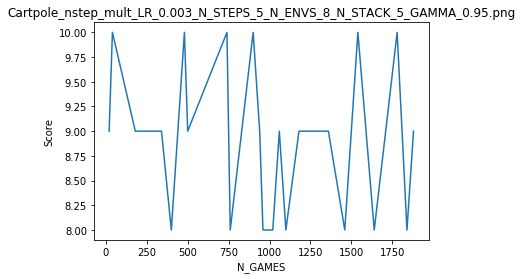

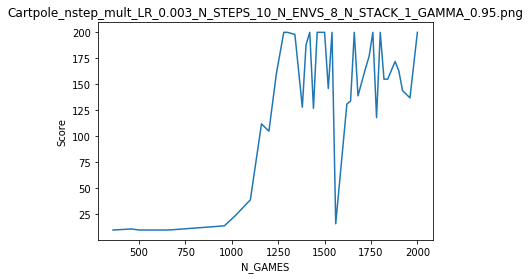

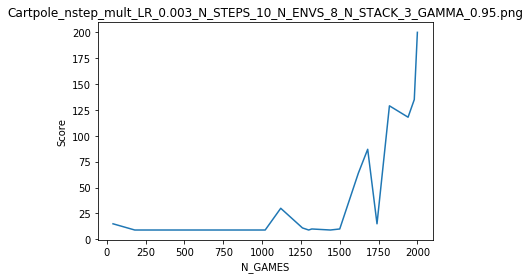

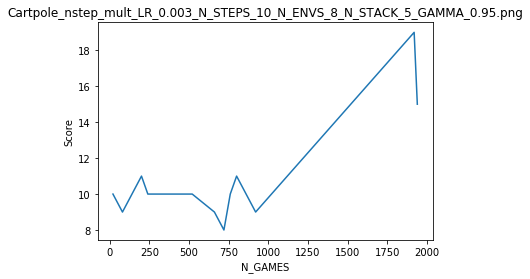

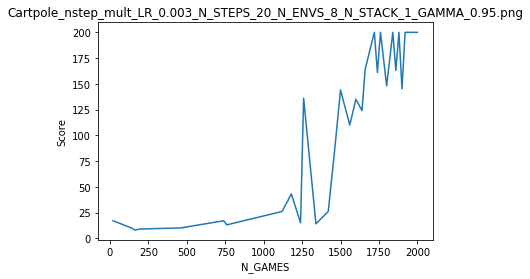

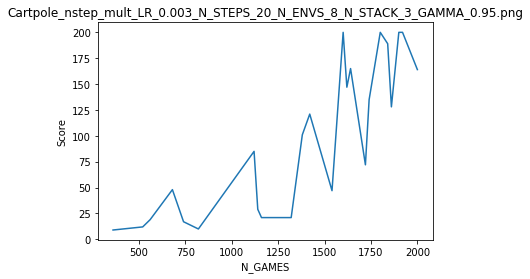

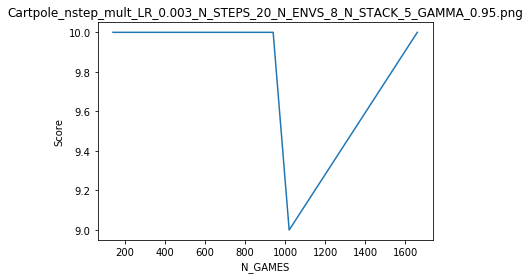

In [7]:
for envs in [1,2,4,8]:
    for steps in [2,5,10,20]:
        for stack in [1, 3, 5]:
            run_set(steps, envs, stack, LR, GAMMA)

In [13]:
def run_set(N_STEPS, N_ENVS, N_STACK, LR, GAMMA):
    num_games = []
    scores = []
    
    global actions_memory, states_memory, dones_memory
    states_memory = []
    actions_memory = []
    rewards_memory = []
    dones_memory = []
    cum_scores_memory = []

    torch.manual_seed(SEED)
    np.random.seed(SEED)

    global model

    envs = Envs(N_ENVS, N_STACK)

    model = ActorCritic(n_stack=N_STACK)
    
    optimizer = optim.Adam(model.parameters(), lr=LR)
    states = envs.reset()

    while envs.finished_games < N_GAMES: 

        del states_memory[:]
        del actions_memory[:]
        del rewards_memory[:]
        del dones_memory[:]
        del cum_scores_memory[:]

        # act phase
        for step in range(N_STEPS):
            
            s = torch.from_numpy(np.array(states)).float()#.unsqueeze(0) no need now that we've got mult
            #print(s)
            
            action_probs = model.get_action_probs(Variable(s))
            actions = action_probs.multinomial().data.squeeze(1).numpy()
            next_states, rewards, dones, cum_scores = envs.step(actions)
            #print("\n\nnextstate", next_states, "\nrewards", rewards, "\ndones", dones, "\ncumscore", cum_scores)

            states_memory.append(states)
            actions_memory.append(actions)
            rewards_memory.append(rewards)
            dones_memory.append(dones)
            cum_scores_memory.append(cum_scores)
            
            states = next_states # FORGOT THIS LINE!! WAS JUST USING SAME STATES OVER AND OVER!!

        global dones_list, cum_scores_list
        dones_list = np.resize(np.array(dones_memory), (N_STEPS*N_ENVS)) 
        cum_scores_list = np.resize(np.array(cum_scores_memory), (N_STEPS*N_ENVS)) 
        
        if True in dones_list:
            # Reflect phase
            R = np.zeros((N_STEPS, N_ENVS))

            rr = rewards_memory
            rr.reverse()
            dones_memory.reverse()

            s = torch.from_numpy(np.array(states_memory[-1])).float()

            next_returns = model.get_state_value(Variable(s)).data.squeeze(1).numpy()

            R[0] = next_returns * np.invert(dones_memory[0])
            # Note: there will be no Advantage in the last state bc we're defining the Reward of that
            # state as the estimated value of that state

            for r in range(1, len(rr)):
                this_returns = rr[r] + next_returns * .95
                this_returns *= np.invert(dones_memory[r])

                R[r] = this_returns
                next_returns = this_returns


            dones_memory.reverse()
            rewards_discounted = np.flip(R, 0)

            # sticking all states together in a list. with n-step we had multiple steps for 
            # a single actor being fed into model, now we have multiple steps for multiple actors.
            # Everything after this should remain the same except for actions, just that the composition (not the structure)
            # of the states we're feeding in is different. 
            #s = Variable(torch.FloatTensor(states_memory)).view(N_ENVS*N_STEPS, 4) ###???
            
            s = Variable(torch.from_numpy(np.array(states_memory)).float()).view(N_ENVS*N_STEPS,3,40,80)

            action_probs, state_values = model.evaluate_actions(s)

            action_log_probs = action_probs.log() 

            rewards_discounted = Variable(torch.FloatTensor(rewards_discounted)).view(N_ENVS*N_STEPS, 1)

            advantages = rewards_discounted - state_values

            entropy = (action_probs * action_log_probs).sum(1).mean()

            # also have to stack actions in similar way as states
            a = torch.LongTensor(np.array(actions_memory)).view(N_ENVS*N_STEPS, 1)

            chosen_action_log_probs = action_log_probs.gather(1, Variable(a))

            action_gain = (chosen_action_log_probs * advantages).mean()

            value_loss = advantages.pow(2).mean()

            total_loss = value_loss - action_gain - 0.0001*entropy

            optimizer.zero_grad()

            total_loss.backward()

            nn.utils.clip_grad_norm(model.parameters(), 0.5)

            optimizer.step()

            #print("\nRewards", rewards_discounted, "\nState values",  state_values)

            """if envs.finished_games % 50 == 0 and not envs.already_logged:
                s = test_model(model, N_STACK)
                scores.append(s)
                num_games.append(envs.finished_games)
                envs.already_logged = True
                print(envs.finished_games, s)"""
                
        #else: print("Not training bc no failure in this window")


    EXP = "Cartpole_nstep_mult_LR_"+str(LR)+"_N_STEPS_"+str(N_STEPS)+"_N_ENVS_"+str(N_ENVS)\
    +"_N_STACK_"+str(N_STACK)+"_GAMMA_"+str(GAMMA)+".png"

    plt.plot(num_games, scores)
    plt.xlabel("N_GAMES")
    plt.ylabel("Score")
    plt.title(EXP)
    plt.show()
    

In [205]:
model

ActorCritic (
  (conv1): Conv2d(2, 32, kernel_size=(8, 8), stride=(4, 4))
  (conv2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
  (conv3): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
  (linear1): Linear (18432 -> 512)
  (actor): Linear (512 -> 2)
  (critic): Linear (512 -> 1)
)

In [209]:
np.array(envs.reset()).shape

(8, 5, 160, 320)

In [9]:

def test_model(model, n_stack):
    score = 0
    done = False
    env = gym.make('CartPole-v0').unwrapped
    first_frame = env.reset()
    first_frame_pixels = get_screen(env)
    state = StackedObs(first_frame_pixels, n_stack)
    
    global action_probs
    while not done:
        score += 1
        s = torch.from_numpy(state.current_obs).float().unsqueeze(0)
        action_probs = model.get_action_probs(Variable(s))
        #print(action_probs)
        _, action_index = action_probs.max(1)
        action = action_index.data[0] 
        next_frame, reward, done, thing = env.step(action)
        next_frame_pixels = get_screen(env)
        
        state.add_frame(next_frame_pixels.reshape(1,40,80))

    return score


In [261]:
test_model(model, 3)

9

In [17]:
class StackedObs():
    def __init__(self, first_frame, n_stack):
        self.current_obs = np.array([first_frame for i in range(n_stack)])
    
        
    def add_frame(self, frame):
        self.current_obs = np.vstack((frame, self.current_obs[0:-1]))
        return self.current_obs
    
    
class Envs():
    def __init__(self, n_envs, n_stack):
        self.envs = [gym.make('CartPole-v0').unwrapped for i in range(n_envs)]
        self.finished_games = 0
        self.already_logged = False
        self.current_scores = [0 for i in range(n_envs)]
        self.current_states = []
        self.n_stack = n_stack
        
    def step(self, actions):
        rewards = []
        dones = []
        cum_scores = []
        
        for i in range(len(self.envs)):
            self.current_scores[i] += 1
            cum_scores.append(self.current_scores[i])
            
            global env
            env = self.envs[i]
            new_frame, reward, done, _ = env.step(actions[i])
            
            new_frame_pixels = get_screen(env).reshape(1,40,80)
            self.current_states[i].add_frame(new_frame_pixels)
            
            if done: 
                print("score: ", self.current_scores[i])
                self.current_scores[i] = 0
                
                first_frame = env.reset()
                first_frame_pixels = get_screen(env)
                self.current_states[i] = StackedObs(first_frame_pixels, self.n_stack)
                
                self.finished_games += 1
                self.already_logged = False
                
            rewards.append(reward)
            dones.append(done)
            
        return [s.current_obs for s in self.current_states], rewards, dones, cum_scores
    
    def reset(self):
        self.current_states = []
        for env in self.envs:
            first_frame = env.reset()
            first_frame_pixels = get_screen(env)
            first_state = StackedObs(first_frame_pixels, self.n_stack)
            self.current_states.append(first_state)

        return [s.current_obs for s in self.current_states]

In [224]:
envs = Envs(n_envs=1, n_stack=3)
states = envs.reset()

s = torch.from_numpy(np.array(states)).float()

print(s.shape)
model = ActorCritic(n_stack=3)
model.get_action_probs(Variable(s))

torch.Size([1, 3, 160, 320])


Variable containing:
 0.4988  0.5012
[torch.FloatTensor of size 1x2]

In [181]:
get_screen(env)

array([], shape=(0, 0), dtype=uint8)

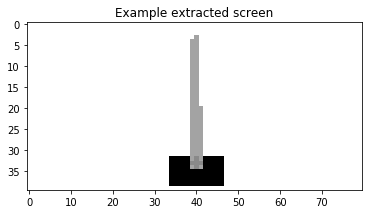

In [18]:
def rgb_to_gray(rgb):
    r, g, b = rgb[0], rgb[1], rgb[2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray.astype(np.uint8)

def downsample(img):
    return img[::4, ::4] # reducing image size SIGNIFICANTLY

# This is based on the code from gym.
screen_width = 600

def get_cart_location(env):
    world_width = env.x_threshold * 2
    scale = screen_width / world_width
    return int(env.state[0] * scale + screen_width / 2.0)  # MIDDLE OF CART


def get_screen(env):
    screen = env.render(mode='rgb_array').transpose((2, 0, 1))  # transpose into torch order (CHW)
    env.render(close=True)
    # Strip off the top and bottom of the screen
    
    screen = screen[:, 160:320]
    view_width = 320
    cart_location = get_cart_location(env)
    if cart_location < view_width // 2:
        slice_range = slice(view_width)
    elif cart_location > (screen_width - view_width // 2):
        slice_range = slice(-view_width, None)
    else:
        slice_range = slice(cart_location - view_width // 2,
                            cart_location + view_width // 2)
    # Strip off the edges, so that we have a square image centered on a cart
    screen = screen[:, :, slice_range]
    
    screen = downsample(rgb_to_gray(screen))
    
    # Convert to float, rescale, convert to torch tensor
    # (this doesn't require a copy)
    
    #screen = np.ascontiguousarray(screen, dtype=np.float32) / 255
    #screen = torch.from_numpy(screen)
    # Resize, and add a batch dimension (BCHW)
    return screen#.unsqueeze(0).type(torch.FloatTensor)


env = gym.make('CartPole-v0').unwrapped
env.reset()
plt.figure()
#plt.imshow(get_screen(env).cpu().squeeze(0).numpy(), interpolation='none', cmap="gray")
plt.imshow(get_screen(env), interpolation='none', cmap="gray")
plt.title('Example extracted screen')
plt.show()


In [21]:
class ActorCritic(nn.Module):
    def __init__(self, n_stack):
        super(ActorCritic, self).__init__()
        """self.linear1 = nn.Linear(n_inputs, 64)
        self.linear2 = nn.Linear(64, 128)
        self.linear3 = nn.Linear(128, 64)"""
        
        self.conv1 = nn.Conv2d(n_stack, 32, 8, stride=4)
        self.conv2 = nn.Conv2d(32, 64, 4, stride=2)
        self.conv3 = nn.Conv2d(64, 32, 3, stride=1)

        self.linear1 = nn.Linear(192, 512)
        
        self.actor = nn.Linear(512, N_ACTIONS)
        self.critic = nn.Linear(512, 1)
    
    def forward(self, x):
        """x = self.linear1(x)
        x = F.relu(x)
        
        x = self.linear2(x)
        x = F.relu(x)
        
        x = self.linear3(x)
        x = F.relu(x)"""
        
        x = self.conv1(x / 255.0)
        x = F.relu(x)

        x = self.conv2(x)
        x = F.relu(x)

        x = self.conv3(x)
        x = F.relu(x)

        x = x.view(-1, 192)
        x = self.linear1(x)
        x = F.relu(x)
        return x
    
    def get_action_probs(self, x):
        x = self(x)
        action_probs = F.softmax(self.actor(x))
        return action_probs
    
    def get_state_value(self, x):
        x = self(x)
        state_value = self.critic(x)
        return state_value
    
    def evaluate_actions(self, x):
        x = self(x)
        action_probs = F.softmax(self.actor(x))
        state_values = self.critic(x)
        return action_probs, state_values
        
        

In [8]:
s = get_screen(env)
print(s.shape)
obs = StackedObs(s, 4)

state, reward, done, _ = env.step(1)
state_pixels = get_screen(env)

s = obs.add_frame(state_pixels.reshape(1,40,80))

torch.from_numpy(s).float().unsqueeze(0)

(40, 80)



(0 ,0 ,.,.) = 
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254
      ...         ⋱        ...      
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254

(0 ,1 ,.,.) = 
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254
      ...         ⋱        ...      
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254

(0 ,2 ,.,.) = 
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254
      ...         ⋱        ...      
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254

(0 ,3 ,.,.) = 
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254
  254  254  254  ...   254  254  254
      ...         ⋱        ...      
  254  254 

In [19]:
s = get_screen(env)
s = np.array([s,s])

#s = torch.from_numpy(s).float().view(1,160, 320).unsqueeze(0)

s = torch.from_numpy(s).float().unsqueeze(0)

print(s.shape)
model = ActorCritic(2)
model.get_action_probs(Variable(s))

(80, 160)
torch.Size([1, 2, 80, 160])


Variable containing:
 0.4916  0.5084
[torch.FloatTensor of size 1x2]

12.7.17 experiment. set up model from scratch. was having problems initially because
wasn't passing discounted returns into the past. There was no signal for model to grab 
on to, seeing as how it was just all ones. Model improved immediately after discounting 
future returns. consistently beat game during training after 7-12k games

12.9.17 Added in n-steps. Had similiar problem. Wasn't estimating final state and working back from there, 
instead was plugging in zero, thus forcing to the model to think that every last step was worth nothing,
which of course was confusing the hell out of it. Frames from a perfectly safe space were being labelled
as end-states. using v(s) instead of zero as base for discounting returns works much better. 
ACTUALLY NO. A small n_steps(5) leads to model blowing up. 

Large n_steps (100) works. Score of 150 after half a minute. 130 after another minute.

50 works, but only score 100 or so after a minute of training.

20 log probs get janky after half a minute, errors out.

200 gets perfect scores of 200 after two min of training.

Is it because we're using very small bits of extremely correlated data? Let's try with multiple envs and see...

12.15.17
Check out notes in nstep model for update on LR and grad clipping. With those we get score 100 after 10k periods of 5 steps each with 16 actors. Don't think that's true actually. I think model was cached. Trying again it appears that it takes a minute for it to begin training at all. Afterwards we're getting cycles btwn 10 and 70 after 10 minutes of training. How are we getting such variability in scores? Stopping after 15 min.

Trying with 3 actors instead of 16: Training catches MUCH faster. Hit 200 after 20 seconds but still extremely variable. Settles on long time of 9s and 10s. (LR of 3e-3)

Drop LR to 7e-4 and learning never catches

12.18 continuing experiment from vanilla and nstep

Adding deep network and keeping everything else the same. LR 3e-3, nstep 20, gamma .95. we'll try 5 envs to start.

Deepening net alone did nothing.

Next, troubleshoot this until a single env version behaves same as nstep. Then scale up. If nstep version works well, five of them together should be even better bc batch size is bigger. 

Task: find out why mult with one env doesn't act as well as nstep with same settings.

Findings: state values in each minibatch are IDENTICAL to one another. The states we're feeding in are INDENTICAL as well... Fixing this, training finally begins to catch, though still work to be done.

Taking only windows in which failure occured looks good. Next, fixing it so that games that end at 200 aren't labelled as failures.

12.20 adding in stacked observations. First, stacking cartpole observations to get stacking, queing mechanism up and running. First bug run into is size mismatch using stack of 4. Stack of 1 works as it should--as if no stacking at all. Problem was in test_model forgot to account for stacking. Lesson: Read errors more carefully!

Gridsearch on nsteps, envs, stacks. Stack of 1 works best. Maybe bc neural net is small? Maybe try bigger neural net.

12.21 bug report. Taking pixels from cartpole. successfully got pixels and turned them to greyscale. in attaching CNN ran into problem with size mismatch